In [2]:
import keras
import numpy as np
from PIL import Image
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
#inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
#resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
#mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [49]:
model = vgg16.VGG16(include_top = True, weights = 'imagenet')

#remove the classification layer (fc8) softmax?
model.layers.pop()

#remove the next fully connected layer (fc7)
model.layers.pop()

#fix the output of the model
model.outputs = [model.layers[-1].output]

#Stripped down model with 4096 category output

PIL image size (224, 224)


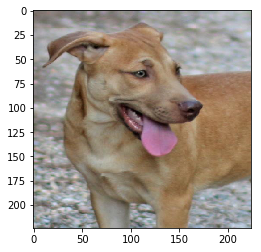

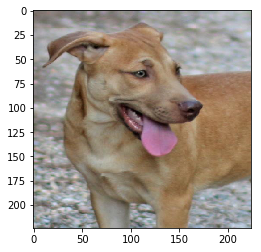

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


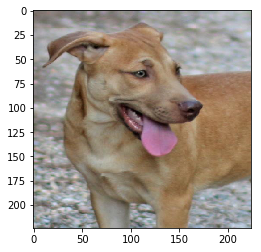

In [50]:
filename = 'data/59442765_500x625.jpg'

#im = Image.open(filename)
#im.rotate(-90).show()
#rotate_image(filename)

# Load image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()
 
# Convert PIL image to NumPy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

PIL image size (224, 224)


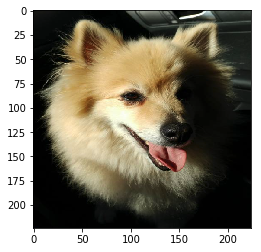

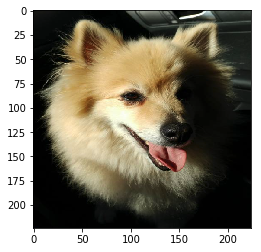

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


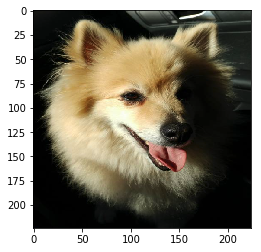

In [51]:
filename_a = 'data/Nibu.png'

# Load image in PIL format
original_a = load_img(filename_a, target_size=(224, 224))
print('PIL image size', original_a.size)
plt.imshow(original_a)
plt.show()
 
# Convert PIL image to NumPy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image_a = img_to_array(original_a)
plt.imshow(np.uint8(numpy_image_a))
plt.show()
print('numpy array size',numpy_image_a.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch_a = np.expand_dims(numpy_image_a, axis=0)
print('image batch size', image_batch_a.shape)
plt.imshow(np.uint8(image_batch_a[0]))

In [6]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
#processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)

[[('n02115641', 'dingo', 0.32399222), ('n02091244', 'Ibizan_hound', 0.15910307), ('n02099849', 'Chesapeake_Bay_retriever', 0.099244684), ('n02087394', 'Rhodesian_ridgeback', 0.09656441), ('n02105412', 'kelpie', 0.08905335)]]


In [35]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
processed_image_a = vgg16.preprocess_input(image_batch_a.copy())
#processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = model.predict(processed_image)
predictions_a = model.predict(processed_image_a)
# print predictions
 
print(predictions)
print(predictions_a)
    
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
#label = decode_predictions(predictions)
#print(label)

[[25.738361   2.6617675  0.        ...  0.         0.         0.       ]]
[[ 0.         0.         0.        ... 12.4172325  0.         9.25898  ]]


In [37]:
from scipy.spatial import distance

score_cos = distance.cosine(predictions.flatten(), predictions_a.flatten())
score_braycurtis = distance.braycurtis(predictions.flatten(), predictions_a.flatten())
score_canberra = distance.canberra(predictions.flatten(), predictions_a.flatten())
score_cheb = distance.chebyshev(predictions.flatten(), predictions_a.flatten())
score_euclid = distance.euclidean(predictions.flatten(), predictions_a.flatten())
score_manhattan = distance.cityblock(predictions.flatten(), predictions_a.flatten())

score_list = [score_cos, score_braycurtis, score_cheb, score_canberra, score_euclid, score_manhattan]
score_list

[0.8661580979824066,
 0.8765813609683086,
 47.4136,
 1108.5137432366973,
 397.4783935546875,
 10471.203]

In [39]:
#max(predictions.flatten())
avg_predict_val = sum(predictions.flatten())/len(predictions.flatten())
#predictions.size
predictions

array([[25.738361 ,  2.6617675,  0.       , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [38]:
predictions > avg_predict_val

array([[ True,  True, False, ..., False, False, False]])

In [25]:

    
    #b = np.unpackbits(predictions, axis=1)

#is this a valid way to convert a numpy array to a binary array? Need it to calculate Hamming distance.
a = np.where(predictions > avg_predict_val, 1, 0)
a

array([[1, 1, 0, ..., 0, 0, 0]])

In [1]:
'''
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation='linear', name='bottleneck'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=784, activation='hard_sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
'''

"\nmodel = Sequential()\nmodel.add(Dense(units=128, activation='relu', input_dim=))\nmodel.add(Dense(units=64, activation='relu'))\nmodel.add(Dense(units=2, activation='linear', name='bottleneck'))\nmodel.add(Dense(units=64, activation='relu'))\nmodel.add(Dense(units=128, activation='relu'))\nmodel.add(Dense(units=784, activation='hard_sigmoid'))\nmodel.compile(loss='categorical_crossentropy', optimizer='adam')\n"

In [6]:
import time
from PIL import Image
import urllib.request
import io

In [7]:
def img_to_array(url):
    
    model = vgg16.VGG16(include_top = True, weights = 'imagenet')
    # Remove the classification layer (fc8) softmax
    model.layers.pop()
    # Remove the next fully connected layer (fc7)
    model.layers.pop()
    # Modify output of the model
    model.outputs = [model.layers[-1].output]
    
    # Fetch image from url
    with urllib.request.urlopen(url) as url:
        f = io.BytesIO(url.read())
    img = Image.open(f)
    dog = img.resize((224, 224)) #image.ANTIALIAS resampling optional for PIL method
    #Load image and resize
    #dog = load_img(img, target_size=(224, 224))
    #plt.imshow(original)
    #plt.show()
    # Convert to numpy array
    numpy_image = img_to_array(dog)
    #plt.imshow(np.uint8(numpy_image))
    #plt.show()
    #print('numpy array size',numpy_image.shape)
    # Convert into batch format
    image_batch = np.expand_dims(numpy_image, axis=0)
    #print('image batch size', image_batch.shape)
    #plt.imshow(np.uint8(image_batch[0]))

    # Prepare image for model
    processed_image = vgg16.preprocess_input(image_batch.copy())
    # Get 1D numpy array with 4096 attributes
    return model.predict(processed_image).flatten()

In [8]:
start = time.time()
url = 'https://s3.amazonaws.com/filestore.rescuegroups.org/704/pictures/animals/6482/6482925/38852933_500x375.jpg'
result = img_to_array(url)
end = time.time()
print(end - start)
#dog = load_img(url, target_size=(224, 224))
#plt.imshow(dog)
#plt.show()



'''

URL = 'https://s3.amazonaws.com/filestore.rescuegroups.org/704/pictures/animals/6482/6482925/38852933_500x375.jpg'

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = Image.open(f)

plt.imshow(img)
plt.show()

'''


AttributeError: 'Image' object has no attribute 'type'